# Missile Guidance Simulation
2D/3D Vector-Form Biased Proportional Navigation Guidance Law is implemented.
The bias command currently implemented considers target being stationary.

## Vector BPNG Equations
* Three-dimensional lead angle
$$ \sigma = \cos^{-1}\left(\hat{\mathbf{r}} \cdot \hat{\mathbf{v}}\right) \in \left[0,\pi\right] $$

* Manoeuvre plane unit normal vector
$$ \hat{\mathbf{k}} = \frac{\mathbf{r} \times \mathbf{v}}{\left\|\mathbf{r} \times \mathbf{v}\right\|} $$

* Predicted final velocity direction vector
$$ 	\begin{aligned}
	\hat{\mathbf{v}}_{f_{pred}} &= \hat{\mathbf{v}} \cos\left(\frac{N}{N-1}\sigma\right) - \left(\hat{\mathbf{k}}\times\hat{\mathbf{v}}\right)\sin\left(\frac{N}{N-1}\sigma\right)\\
	&= \hat{\mathbf{r}} \cos\left(\frac{1}{N-1}\sigma\right) - \left(\hat{\mathbf{k}}\times\hat{\mathbf{r}}\right)\sin\left(\frac{1}{N-1}\sigma\right)
\end{aligned} $$

* Predicted final velocity direction error angle
$$ e = \cos^{-1}\left(\hat{\mathbf{v}}_{f_{pred}} \cdot \hat{\mathbf{v}}_{f_{d}}\right) \in \left[0,\pi\right] $$

* Desired angular velocity of predicted final velocity direction vector
$$ \boldsymbol{\omega}_{f_{d}} = -K_{e}\left(r\right) \dot{r} e   \frac{\hat{\mathbf{v}}_{f_{pred}} \times \hat{\mathbf{v}}_{f_{d}}}{\left\|\hat{\mathbf{v}}_{f_{pred}} \times \hat{\mathbf{v}}_{f_{d}}\right\|} + K_{roll}\left(r\right) \hat{\mathbf{v}}_{f_{d}} $$

* Bias angular velocity command
$$ \boldsymbol{\omega}_{bias} = K_{\sigma}\left(\sigma\right) \left[-\left(N-1\right) \left(\boldsymbol{\omega}_{f_{d}}\cdot \hat{\mathbf{k}}\right) \hat{\mathbf{k}}  + \sin\sigma \,\boldsymbol{\omega}_{f_{d}} \cdot \left\{\hat{\mathbf{r}} + \cot\left(\frac{1}{N-1}\sigma\right)\left(\hat{\mathbf{k}}\times\hat{\mathbf{r}}\right)\right\} \left(\hat{\mathbf{v}} \times \hat{\mathbf{k}}\right)\right] $$

* LOS angular velocity
$$ \boldsymbol{\omega}_{r}^{r\perp} = \frac{\mathbf{v} \times \mathbf{r}}{\left\| \mathbf{r} \right\|^{2}} = -\frac{v\sin\sigma}{r}\hat{\mathbf{k}} $$

* Lateral acceleration command
$$ \mathbf{a}_{BPNG}^{v\perp} = \left(N\boldsymbol{\omega}_{r}^{r\perp} + \boldsymbol{\omega}_{bias}\right) \times \mathbf{v} $$

<!-- 2D lateral acceleration command is given as follows:

$\displaystyle a_{cmd} = NV\dot{\lambda} - \frac{K_{r}\left(r\right)K_{\eta}\left(\eta\right)}{r}e_{\gamma_{f}}$ -->

In [1]:
include("main_missiles.jl")

main (generic function with 1 method)

In [2]:
include("sim_missiles.jl")

# To avoid redefinition of a named (or an anonymous) function at each time tuning parameters and running simulation,
# place the custom definition of a bias command function in a different cell from the cell containing sim_plot.

custom_bias(s,x,t) = zeros(3)                           # option 1
# function custom_bias(s,x,t)  return zeros(3) end      # option 2
# custom_bias = (s,x,t) -> zeros(3)                     # option 3

custom_bias (generic function with 1 method)

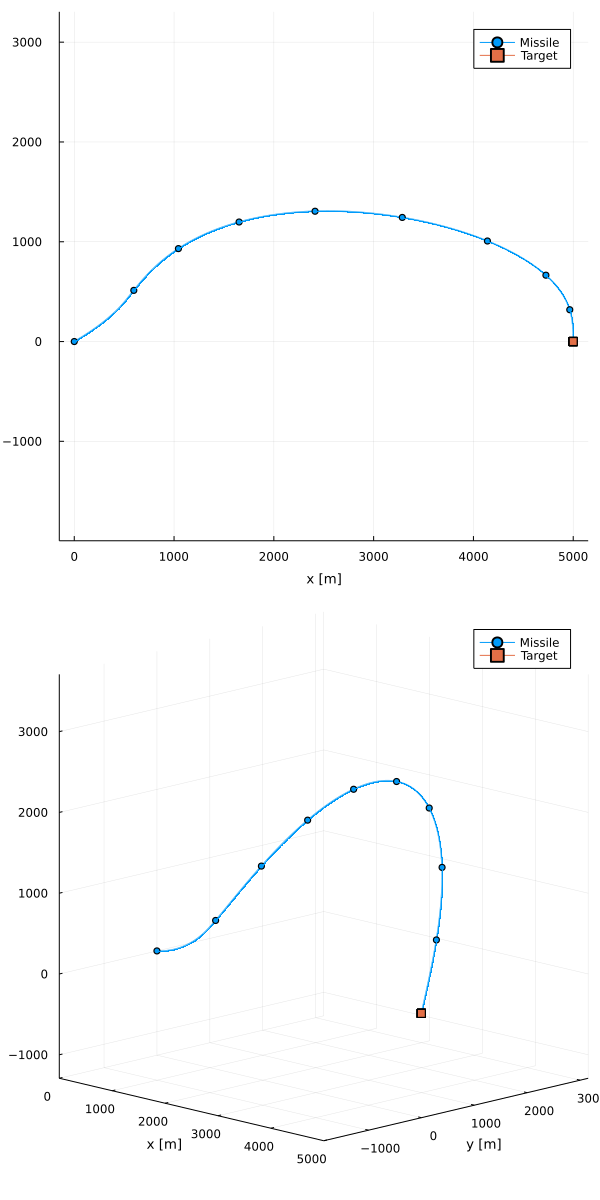

  0.237062 seconds (1.62 M allocations: 98.709 MiB)


In [5]:
# Repeat running only this cell when compilation is once completed by evaluating previous cells.
# Reconstruction of functions and structures will lead to repeated compilation.
# Change design parameters and initial/final configurations here for rapid execution

s_BPNG.Bias = Bias_IACG_StationaryTarget
# p_M_0 = [0E3; 0; 0]
# p_T_0 = [5E3; 0; 0]
# A_M_max = 100
γ_f_d = deg2rad(-70)
χ_f_d = deg2rad(180)
s_BPNG.v̂_f_d = [cos(γ_f_d)*sin(χ_f_d); cos(γ_f_d)*cos(χ_f_d); sin(γ_f_d)]
df, f = sim_plot(p_M_0, v_M_0, p_T_0, v_T_0, s_BPNG, A_M_max);

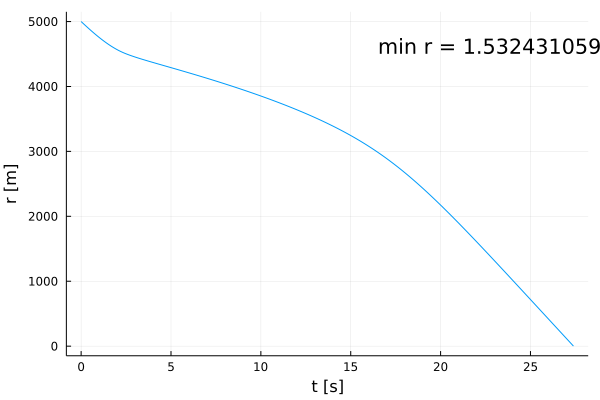

In [4]:
t = df.time
r = df.sol |> Map(datum -> datum.r) |> collect
plot(t,r, label = :false, xlabel = "t [s]", ylabel = "r [m]")
annotate!((0.9,0.9), "min r = "*string(minimum(r)) )